In [54]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


In [6]:
train = pd.read_csv('train.csv')
val = pd.read_csv('val.csv')
test = pd.read_csv('test.csv')

train = train.dropna()
test = test.dropna()
val = val.dropna()

y_train = train.target
y_val = val.target
y_test = test.target

In [7]:
my_stop_words = ['wa', 'would', 'ha', 'one', 'get']
tfidfvectorizer = TfidfVectorizer(min_df = 0.001, ngram_range=(1, 2), stop_words=my_stop_words)
tfidf_train = tfidfvectorizer.fit_transform(train.text)
tfidf_val = tfidfvectorizer.transform(val.text)
tfidf_test = tfidfvectorizer.transform(test.text)

In [17]:
def binarize_target(target, thr):
    return (target > thr).astype(int)


def run_grid_search(est, param_grid, scoring, x_train, y_train, thr):
    y_train_bin = binarize_target(y_train, thr)
    model = GridSearchCV(estimator=est, param_grid=param_grid, scoring=scoring, cv=3, verbose=3)
    model.fit(x_train, y_train_bin)
    return model

def evaluate(model, tfidf_x, y_bin):
    return roc_auc_score(y_bin, model.predict(tfidf_x))

In [5]:
grid = {'C': [1, 10], 'gamma': [0.001, 0.01, 1]}

In [30]:
SVC_point5 = run_grid_search(
    est=svm.SVC(), 
    param_grid=grid,
    scoring='roc_auc',
    x_train=tfidf_train,
    y_train=y_train,
    thr=0.5
)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ..................C=1, gamma=0.001;, score=0.853 total time= 4.4min
[CV 2/3] END ..................C=1, gamma=0.001;, score=0.856 total time= 4.1min
[CV 3/3] END ..................C=1, gamma=0.001;, score=0.855 total time= 4.0min
[CV 1/3] END ...................C=1, gamma=0.01;, score=0.869 total time= 3.9min
[CV 2/3] END ...................C=1, gamma=0.01;, score=0.872 total time= 3.9min
[CV 3/3] END ...................C=1, gamma=0.01;, score=0.872 total time= 3.9min
[CV 1/3] END ......................C=1, gamma=1;, score=0.928 total time= 7.1min
[CV 2/3] END ......................C=1, gamma=1;, score=0.928 total time= 7.0min
[CV 3/3] END ......................C=1, gamma=1;, score=0.929 total time= 7.0min
[CV 1/3] END .................C=10, gamma=0.001;, score=0.869 total time= 3.9min
[CV 2/3] END .................C=10, gamma=0.001;, score=0.873 total time= 3.9min
[CV 3/3] END .................C=10, gamma=0.001;,

In [31]:
SVC_point5.best_params_

{'C': 1, 'gamma': 1}

In [32]:
SVC_point6 = run_grid_search(
    est=svm.SVC(), 
    param_grid=grid,
    scoring='roc_auc',
    x_train=tfidf_train,
    y_train=y_train,
    thr=0.6
)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ..................C=1, gamma=0.001;, score=0.854 total time= 2.5min
[CV 2/3] END ..................C=1, gamma=0.001;, score=0.850 total time= 2.2min
[CV 3/3] END ..................C=1, gamma=0.001;, score=0.846 total time= 2.2min
[CV 1/3] END ...................C=1, gamma=0.01;, score=0.854 total time= 2.4min
[CV 2/3] END ...................C=1, gamma=0.01;, score=0.850 total time= 2.3min
[CV 3/3] END ...................C=1, gamma=0.01;, score=0.847 total time= 2.4min
[CV 1/3] END ......................C=1, gamma=1;, score=0.858 total time= 6.5min
[CV 2/3] END ......................C=1, gamma=1;, score=0.854 total time= 6.2min
[CV 3/3] END ......................C=1, gamma=1;, score=0.853 total time= 6.4min
[CV 1/3] END .................C=10, gamma=0.001;, score=0.854 total time= 2.3min
[CV 2/3] END .................C=10, gamma=0.001;, score=0.850 total time= 2.3min
[CV 3/3] END .................C=10, gamma=0.001;,

In [33]:
SVC_point6.best_params_

{'C': 1, 'gamma': 1}

In [ ]:
SVC_point4 = run_grid_search(
    est=svm.SVC(), 
    param_grid=grid,
    scoring='roc_auc',
    x_train=tfidf_train,
    y_train=y_train,
    thr=0.4
)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ..................C=1, gamma=0.001;, score=0.854 total time= 4.1min
[CV 2/3] END ..................C=1, gamma=0.001;, score=0.857 total time= 4.1min
[CV 3/3] END ..................C=1, gamma=0.001;, score=0.857 total time= 4.1min
[CV 1/3] END ...................C=1, gamma=0.01;, score=0.869 total time= 4.0min
[CV 2/3] END ...................C=1, gamma=0.01;, score=0.872 total time= 4.0min
[CV 3/3] END ...................C=1, gamma=0.01;, score=0.872 total time= 4.0min
[CV 1/3] END ......................C=1, gamma=1;, score=0.929 total time= 7.3min
[CV 2/3] END ......................C=1, gamma=1;, score=0.929 total time= 7.2min
[CV 3/3] END ......................C=1, gamma=1;, score=0.930 total time= 7.1min
[CV 1/3] END .................C=10, gamma=0.001;, score=0.870 total time= 3.9min
[CV 2/3] END .................C=10, gamma=0.001;, score=0.873 total time= 4.0min
[CV 3/3] END .................C=10, gamma=0.001;,

In [ ]:
SVC_point4.best_params_

In [18]:
print("roc-auc on validation with 0.4 thr {:.4f}".format(round(evaluate(SVC_point4, tfidf_val, binarize_target(y_val, 0.4)), 4)))
print("roc-auc on validation with 0.5 thr {:.4f}".format(round(evaluate(SVC_point5, tfidf_val, binarize_target(y_val, 0.5)), 4)))
print("roc-auc on validation with 0.6 thr {:.4f}".format(round(evaluate(SVC_point6, tfidf_val, binarize_target(y_val, 0.6)), 4)))

roc-auc on validation with 0.4 thr 0.8569
roc-auc on validation with 0.5 thr 0.8550
roc-auc on validation with 0.6 thr 0.6916


Модель с порогом 0.4 оказалась лучшей

In [37]:
grid = {
    "learning_rate": [0.01, 0.05, 0.2],
    "max_depth":[10,20],
    }

In [38]:
GB_point5 = run_grid_search(
    est=GradientBoostingClassifier(), 
    param_grid=grid,
    scoring='roc_auc',
    x_train=tfidf_train,
    y_train=y_train,
    thr=0.5
)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ..learning_rate=0.01, max_depth=10;, score=0.784 total time=  59.5s
[CV 2/3] END ..learning_rate=0.01, max_depth=10;, score=0.778 total time= 1.0min
[CV 3/3] END ..learning_rate=0.01, max_depth=10;, score=0.783 total time= 1.0min
[CV 1/3] END ..learning_rate=0.01, max_depth=20;, score=0.832 total time= 2.4min
[CV 2/3] END ..learning_rate=0.01, max_depth=20;, score=0.828 total time= 2.4min
[CV 3/3] END ..learning_rate=0.01, max_depth=20;, score=0.829 total time= 2.4min
[CV 1/3] END ..learning_rate=0.05, max_depth=10;, score=0.886 total time=  58.8s
[CV 2/3] END ..learning_rate=0.05, max_depth=10;, score=0.882 total time=  58.4s
[CV 3/3] END ..learning_rate=0.05, max_depth=10;, score=0.887 total time=  58.5s
[CV 1/3] END ..learning_rate=0.05, max_depth=20;, score=0.905 total time= 2.2min
[CV 2/3] END ..learning_rate=0.05, max_depth=20;, score=0.900 total time= 2.3min
[CV 3/3] END ..learning_rate=0.05, max_depth=20;,

In [40]:
GB_point5.best_params_

{'learning_rate': 0.2, 'max_depth': 20}

In [41]:
GB_point6 = run_grid_search(
    est=GradientBoostingClassifier(), 
    param_grid=grid,
    scoring='roc_auc',
    x_train=tfidf_train,
    y_train=y_train,
    thr=0.6
)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ..learning_rate=0.01, max_depth=10;, score=0.750 total time= 1.1min
[CV 2/3] END ..learning_rate=0.01, max_depth=10;, score=0.750 total time= 1.1min
[CV 3/3] END ..learning_rate=0.01, max_depth=10;, score=0.743 total time= 1.1min
[CV 1/3] END ..learning_rate=0.01, max_depth=20;, score=0.774 total time= 2.7min
[CV 2/3] END ..learning_rate=0.01, max_depth=20;, score=0.771 total time= 2.6min
[CV 3/3] END ..learning_rate=0.01, max_depth=20;, score=0.775 total time= 2.6min
[CV 1/3] END ..learning_rate=0.05, max_depth=10;, score=0.826 total time= 1.0min
[CV 2/3] END ..learning_rate=0.05, max_depth=10;, score=0.821 total time=  59.8s
[CV 3/3] END ..learning_rate=0.05, max_depth=10;, score=0.824 total time=  59.2s
[CV 1/3] END ..learning_rate=0.05, max_depth=20;, score=0.827 total time= 2.2min
[CV 2/3] END ..learning_rate=0.05, max_depth=20;, score=0.822 total time= 2.2min
[CV 3/3] END ..learning_rate=0.05, max_depth=20;,

In [42]:
GB_point6.best_params_

{'learning_rate': 0.2, 'max_depth': 10}

In [43]:
GB_point4 = run_grid_search(
    est=GradientBoostingClassifier(), 
    param_grid=grid,
    scoring='roc_auc',
    x_train=tfidf_train,
    y_train=y_train,
    thr=0.4
)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ..learning_rate=0.01, max_depth=10;, score=0.785 total time=  59.2s
[CV 2/3] END ..learning_rate=0.01, max_depth=10;, score=0.778 total time=  59.7s
[CV 3/3] END ..learning_rate=0.01, max_depth=10;, score=0.784 total time=  59.2s
[CV 1/3] END ..learning_rate=0.01, max_depth=20;, score=0.833 total time= 2.3min
[CV 2/3] END ..learning_rate=0.01, max_depth=20;, score=0.825 total time= 2.3min
[CV 3/3] END ..learning_rate=0.01, max_depth=20;, score=0.828 total time= 2.3min
[CV 1/3] END ..learning_rate=0.05, max_depth=10;, score=0.888 total time=  58.5s
[CV 2/3] END ..learning_rate=0.05, max_depth=10;, score=0.882 total time=  57.9s
[CV 3/3] END ..learning_rate=0.05, max_depth=10;, score=0.886 total time=  58.6s
[CV 1/3] END ..learning_rate=0.05, max_depth=20;, score=0.906 total time= 2.3min
[CV 2/3] END ..learning_rate=0.05, max_depth=20;, score=0.900 total time= 2.2min
[CV 3/3] END ..learning_rate=0.05, max_depth=20;,

In [44]:
GB_point4.best_params_

{'learning_rate': 0.2, 'max_depth': 20}

In [45]:
print("roc-auc on validation with 0.4 thr {:.4f}".format(round(evaluate(GB_point4, tfidf_val, binarize_target(y_val, 0.4)), 4)))
print("roc-auc on validation with 0.5 thr {:.4f}".format(round(evaluate(GB_point5, tfidf_val, binarize_target(y_val, 0.5)), 4)))
print("roc-auc on validation with 0.6 thr {:.4f}".format(round(evaluate(GB_point6, tfidf_val, binarize_target(y_val, 0.6)), 4)))

roc-auc on validation with 0.4 thr 0.8602
roc-auc on validation with 0.5 thr 0.8590
roc-auc on validation with 0.6 thr 0.7310


In [56]:
word2idx = tfidfvectorizer.vocabulary_
idx2word = [""] * len(word2idx)

for word in word2idx:
    idx2word[word2idx[word]] = word
idx2word = np.array(idx2word, dtype='object')

In [82]:
val_features_small_id = np.argsort(GB_point4.best_estimator_.feature_importances_)[-20:]
small_importance = GB_point4.best_estimator_.feature_importances_[val_features_small_id]
min_words = idx2word[val_features_small_id]

In [78]:
GB_point4.best_estimator_.feature_importances_[np.argsort(GB_point4.best_estimator_.feature_importances_)]

array([0.        , 0.        , 0.        , ..., 0.0217896 , 0.0387285 ,
       0.06659258])

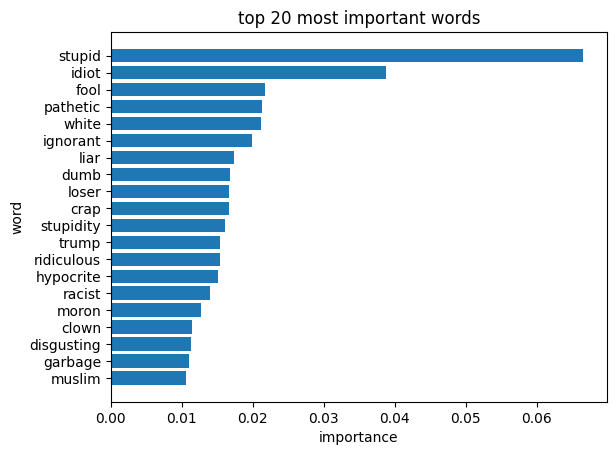

In [84]:
plt.barh(min_words, small_importance)
plt.xlabel('importance')
plt.ylabel('word')
plt.title('top 20 most important words')
plt.show()

In [7]:
%%timeit

model = GradientBoostingClassifier(learning_rate=0.2, max_depth=20).fit(tfidf_train, y_train_bin)

3min 6s ± 5.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
model = GradientBoostingClassifier(learning_rate=0.2, max_depth=20).fit(tfidf_train, y_train_bin)

In [13]:
%%timeit

model.predict(tfidf_test)

The slowest run took 5.31 times longer than the fastest. This could mean that an intermediate result is being cached.
361 ms ± 255 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
model = svm.SVC(C=1, gamma=1).fit(tfidf_train, y_train_bin)

In [8]:
%%timeit

model.predict(tfidf_test)

1min 32s ± 399 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
